## Language proportion

In [290]:
src_len = []
with open("/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_de/tmp/bpe.train.en", "r") as f:
    for line in f:
        src_len.append(len(line.strip().split(" ")))
dst_len = []
with open("/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_de/tmp/bpe.train.de", "r") as f:
    for line in f:
        dst_len.append(len(line.strip().split(" ")))

import numpy
print(numpy.mean(src_len), numpy.mean(dst_len), numpy.mean(dst_len) / numpy.mean(src_len))

28.515307572466927 29.476822397092157 1.0337192513944202


In [291]:
src_len = []
with open("/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_fr/tmp/bpe.train.en", "r") as f:
    for line in f:
        src_len.append(len(line.strip().split(" ")))
dst_len = []
with open("/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_fr/tmp/bpe.train.fr", "r") as f:
    for line in f:
        dst_len.append(len(line.strip().split(" ")))

import numpy
print(numpy.mean(src_len), numpy.mean(dst_len), numpy.mean(dst_len) / numpy.mean(src_len))

31.767680214401295 36.95218149974367 1.163200499701331


## Prepare splits

valid.de 26.811666666666667 16.307427670304786
test.de 27.96836496836497 14.574415413297332


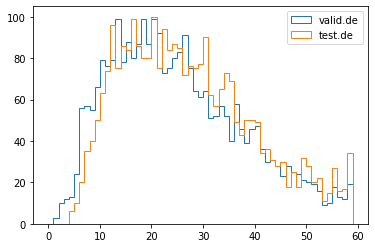

In [84]:
for d in ["valid.de", "test.de"]:
    en_len = []
    with open("/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_de/tmp/bpe." + d, "r") as f:
        for line in f:
            en_len.append(len(line.strip().split(" ")))
    print(d, numpy.mean(en_len), numpy.std(en_len))
    plt.hist(en_len, bins=numpy.arange(60), label=d, histtype="step")
plt.legend()

In [101]:
!head -n2 /checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_de/tmp/bpe.test.de-3

Sie stehen keine 100 Meter voneinander entfernt : Am Dienstag ist in Gut@@ ach die neue B 33 @-@ Fußgänger@@ amp@@ el am Dorf@@ park@@ platz in Betrieb genommen worden - in Sicht@@ weite der älteren Rath@@ aus@@ amp@@ el .
Wir haben das Museum , zwei Kirchen , Kur@@ park , die Bus@@ haltestelle , einen Arzt und eine Bank sowie den Verkehrs@@ fluss aus dem Wohn@@ gebiet › Gru@@ b ‹ .


In [100]:
!head -n2 /checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_de/tmp/bpe.test.en-3

They are not even 100 metres apart : On Tuesday , the new B 33 pedestrian lights in Dorf@@ park@@ platz in Gut@@ ach became operational - within view of the existing Town Hall traffic lights .
We have the museum , two churches , the spa gardens , the bus stop , a doctor &apos;s practice and a bank , not to mention the traffic from the &apos; Gru@@ b &apos; residential area .


In [97]:
!head -n2 /checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_de/tmp/bpe.test.en

Gut@@ ach : Incre@@ ased safety for pedestri@@ ans
They are not even 100 metres apart : On Tuesday , the new B 33 pedestrian lights in Dorf@@ park@@ platz in Gut@@ ach became operational - within view of the existing Town Hall traffic lights .


In [102]:
!head -n2 /checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_de/tmp/bpe.test.de

Gut@@ ach : Noch mehr Sicherheit für Fußgän@@ ger
Sie stehen keine 100 Meter voneinander entfernt : Am Dienstag ist in Gut@@ ach die neue B 33 @-@ Fußgänger@@ amp@@ el am Dorf@@ park@@ platz in Betrieb genommen worden - in Sicht@@ weite der älteren Rath@@ aus@@ amp@@ el .


In [146]:
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_de/tmp/"
for i in range(1, 4):
    for d in ["valid.en", "test.en"]:
        with open(f"{prefix}bpe-{i}.{d}", "r") as f:
            a = [len(line.strip().split(" ")) for line in f]
            print(i, d, numpy.min(a), numpy.max(a))
    

1 valid.en 1 27
1 test.en 2 56
2 valid.en 10 38
2 test.en 12 41
3 valid.en 17 118
3 test.en 20 104


In [145]:
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_de/tmp/"
for i in range(1, 4):
    for d in ["valid.de", "test.de"]:
        with open(f"{prefix}bpe-{i}.{d}", "r") as f:
            a = [len(line.strip().split(" ")) for line in f]
            print(i, d, numpy.min(a), numpy.max(a))
    

1 valid.de 1 18
1 test.de 4 20
2 valid.de 19 30
2 test.de 21 32
3 valid.de 31 133
3 test.de 33 100


valid.de 26.811666666666667 16.307427670304786
valid.de 962 1941 3000
test.de 27.96836496836497 14.574415413297332
test.de 984 1961 3003


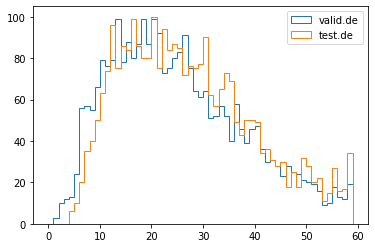

In [136]:
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_de/tmp/"
for d in ["valid.de", "test.de"]:
    en_len = []
    with open(prefix + "bpe." + d, "r") as f:
        for line in f:
            en_len.append(len(line.strip().split(" ")))
    en_len = numpy.array(en_len)
    print(d, numpy.mean(en_len), numpy.std(en_len))
    plt.hist(en_len, bins=numpy.arange(60), label=d, histtype="step")
    p = numpy.percentile(en_len, [33, 66])
    print(d, sum(en_len < p[0]), sum(en_len < p[1]), len(en_len))
    index1 = []
    index2 = []
    index3 = []
    with open(prefix + "bpe-1." + d, "w") as f1, open(prefix + "bpe-2." + d, "w") as f2, open(prefix + "bpe-3." + d, "w") as f3:
        with open(prefix + "bpe." + d, "r") as f:
            for n, line in enumerate(f):
                ll = len(line.strip().split(" "))
                if ll <= p[0]:
                    f1.write(line)
                    index1.append(n)
                elif ll <= p[1]:
                    f2.write(line)
                    index2.append(n)
                else:
                    f3.write(line)
                    index3.append(n)
    d_dst = d.replace("de", "en")
    index1 = set(index1)
    index2 = set(index2)
    index3 = set(index3)
    with open(prefix + "bpe-1." + d_dst, "w") as f1, open(prefix + "bpe-2." + d_dst, "w") as f2, open(prefix + "bpe-3." + d_dst, "w") as f3:
        with open(prefix + "bpe." + d_dst, "r") as f:
            for n, line in enumerate(f):
                if n in index1:
                    f1.write(line)
                elif n in index2:
                    f2.write(line)
                else:
                    f3.write(line)
plt.legend()

In [354]:
!wc -l /checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_fr/tmp/bpe.valid.fr

30639 /checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_fr/tmp/bpe.valid.fr


In [353]:
!wc -l /checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_fr/tmp/test.en

3003 /checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_fr/tmp/test.en


In [405]:
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_fr/tmp/"
with open(prefix + "../valid.en", "r") as f:
    filt_valid = set([l for l in f])

with open(prefix + "bpe.valid.en", "r") as f:
    filt_valid2 = set([l for l in f])

In [413]:
!wc -l /checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_fr/tmp/bpe-*.valid.en

   9394 /checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_fr/tmp/bpe-1.valid.en
   8708 /checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_fr/tmp/bpe-2.valid.en
   8752 /checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_fr/tmp/bpe-3.valid.en
  26854 total


valid.fr 35.96324569896477 24.433847659111052
valid.fr 8821 17666 26854
test.fr 31.07192807192807 15.690463044418825
test.fr 959 1944 3003


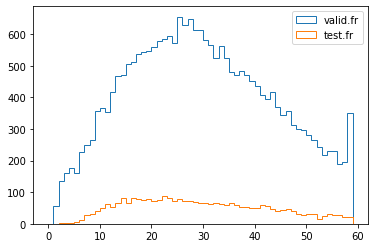

In [412]:
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_fr/tmp/"
for d in ["valid.fr", "test.fr"]:
    en_len = []
    with open(prefix + "../" + d, "r") as f:
        for line in f:
            en_len.append(len(line.strip().split(" ")))
    en_len = numpy.array(en_len)
    print(d, numpy.mean(en_len), numpy.std(en_len))
    plt.hist(en_len, bins=numpy.arange(60), label=d, histtype="step")
    p = numpy.percentile(en_len, [33, 66])
    print(d, sum(en_len < p[0]), sum(en_len < p[1]), len(en_len))
    index1 = []
    index2 = []
    index3 = []
    with open(prefix + "bpe-1." + d, "w") as f1, open(prefix + "bpe-2." + d, "w") as f2, open(prefix + "bpe-3." + d, "w") as f3:
        with open(prefix + "../" + d, "r") as f:
            for n, line in enumerate(f):
                ll = len(line.strip().split(" "))
                if ll <= p[0]:
                    f1.write(line)
                    index1.append(n)
                elif ll <= p[1]:
                    f2.write(line)
                    index2.append(n)
                else:
                    f3.write(line)
                    index3.append(n)
    d_dst = d.replace("fr", "en")
    index1 = set(index1)
    index2 = set(index2)
    index3 = set(index3)
    with open(prefix + "bpe-1." + d_dst, "w") as f1, open(prefix + "bpe-2." + d_dst, "w") as f2, open(prefix + "bpe-3." + d_dst, "w") as f3:
        with open(prefix + "../" + d_dst, "r") as f:
            for n, line in enumerate(f):
                if n in index1:
                    f1.write(line)
                elif n in index2:
                    f2.write(line)
                else:
                    f3.write(line)
plt.legend()

In [355]:
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_fr/tmp/"
for i in range(1, 4):
    for d in ["valid.en", "test.en"]:
        with open(f"{prefix}bpe-{i}.{d}", "r") as f:
            a = [len(line.strip().split(" ")) for line in f]
            print(i, d, numpy.min(a), numpy.max(a))

1 valid.en 1 235
1 test.en 2 33
2 valid.en 1 254
2 test.en 10 43
3 valid.en 1 2846
3 test.en 18 85


In [356]:
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_fr/tmp/"
for i in range(1, 4):
    for d in ["valid.fr", "test.fr"]:
        with open(f"{prefix}bpe-{i}.{d}", "r") as f:
            a = [len(line.strip().split(" ")) for line in f]
            print(i, d, numpy.min(a), numpy.max(a))

1 valid.fr 1 23
1 test.fr 2 22
2 valid.fr 24 40
2 test.fr 23 36
3 valid.fr 41 3212
3 test.fr 37 97


In [358]:
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/pre-process/wmt14_en_fr/tmp/"
for d in ["bpe.valid.fr", "bpe.valid.en"]:
    with open(prefix + d, "r") as f:
        a = [len(line.strip().split(" ")) for line in f]
        print(i, d, numpy.min(a), numpy.max(a))

3 bpe.valid.fr 1 3212
3 bpe.valid.en 1 2846


# BLEU evaluation

In [433]:
from matplotlib import pyplot as plt
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/nmt-experiments/sbatch_log/"
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', #'#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [481]:
def plot_log(log, color, label, k=0, add=50):
    valid = !cat $log | grep BLEU | grep valid | cut -f 3 -d "=" | cut -f 1 -d ","
    test = !cat $log | grep BLEU | grep test | cut -f 3 -d "=" | cut -f 1 -d ","
    valid = list(map(float, valid))
    test = list(map(float, test))
    plt.plot(valid, "k--", color=color)
    plt.plot(test, color=color, label=label)

    index = numpy.argmax(valid[k:])
    print(label, len(valid), valid[k:][index], test[k:][index], index + add + k)
    print(numpy.max(test[k:]))

de sinpos 6-6 57 26.92 27.54 97
27.99
de cape [-5,5], scale=1 57 26.95 27.58 66
28.06
de abspos 6-6 57 26.69 27.33 66
27.76
wmt14ende/wmt-admin-cape-6l-gl-1 29 26.55 27.39 73
27.79
wmt14ende/wmt-admin-cape-6l-gl-20-int 29 26.84 27.85 74
28.03
wmt14ende/wmt-admin-cape-6l-gl-3-750k/ 56 26.61 27.69 93
28.28
wmt14ende/wmt-admin-cape-6l-gl-5-750k/ 56 27.03 27.81 83
28.08


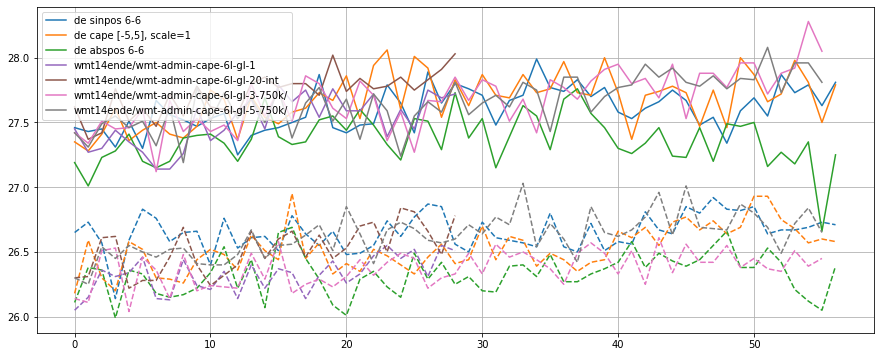

In [482]:
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/nmt-experiments/sbatch_log/"

models_de_6l = {
    "de sinpos 6-6": "41641245.out", 
    "de cape [-5,5], scale=1": "41641867.out",
    "de abspos 6-6": "41641250.out", 
    "wmt14ende/wmt-admin-cape-6l-gl-1": "41754570.out", 
    "wmt14ende/wmt-admin-cape-6l-gl-20-int": "41754584.out",
    "wmt14ende/wmt-admin-cape-6l-gl-3-750k/": "41754585.out",
    "wmt14ende/wmt-admin-cape-6l-gl-5-750k/": "41754590.out"
}

plt.figure(figsize=(15, 6))
plt.grid()
for (label, log), color in zip(models_de_6l.items(), colors):
    plot_log(prefix + log, label=label, color=color)
plt.legend()

sinpos 6-6l-2 33 47.25 41.03 32
41.38
abspos 6-6l-2 33 47.18 41.17 25
41.35
wmt-admin-cape-6l-5 51 47.22 41.59 41
41.62
wmt-admin-cape-6l-20 51 47.18 41.5 45
41.57
wmt-admin-cape-6l-20-int 51 47.14 41.57 41
41.69


(40.0, 47.5785)

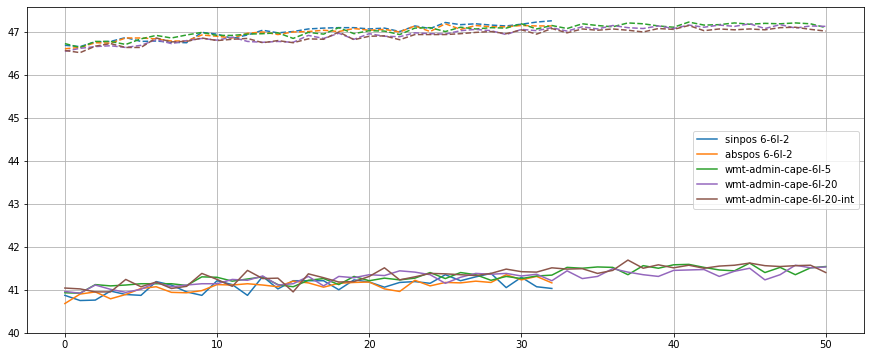

In [483]:
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/nmt-experiments/sbatch_log/"
models_fr = {
#     "sinpos 6-6l": "41790999.out",
             "sinpos 6-6l-2": "41813065.out",
#              "abspos 6-6l": "41791058.out",
             "abspos 6-6l-2": "41813168.out",
             "wmt-admin-cape-6l-5": "41946458.out",
             "wmt-admin-cape-6l-20": "41946462.out",
             "wmt-admin-cape-6l-20-int": "41946465.out"
            }

plt.figure(figsize=(15, 6))
plt.grid()
for (label, log), color in zip(models_fr.items(), colors):
    plot_log(prefix + log, label=label, color=color, k=0, add=0)
plt.legend()
plt.ylim(40,)

de sinpos 18-18-beg 16 26.99 28.09 36
28.34
de abspos 18-18-beg 20 27.25 28.24 41
28.44
wmt-admin-cape-18l-gl-10-750k-beg 26 27.29 28.37 47
28.59
wmt-admin-cape-18l-gl-10-int-750k-beg 26 27.11 28.47 40
28.75
wmt-admin-cape-18l-gl-5-beg 26 26.88 28.63 37
28.67
de sinpos 18-18 52 27.12 27.9 51
28.9
de abspos 18-18 57 27.02 28.62 66
28.8
wmt-admin-cape-18l-gl-10-750k 51 27.12 28.09 51
28.89
wmt-admin-cape-18l-gl-10-int-750k 49 27.09 28.29 72
28.82
wmt-admin-cape-18l-gl-5 49 26.99 28.55 98
28.83


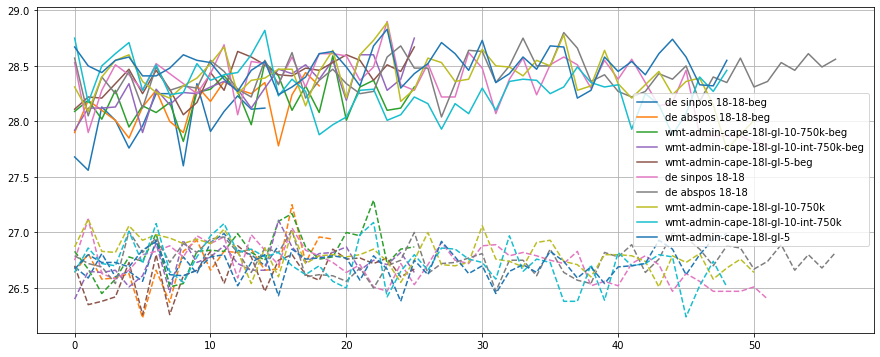

In [460]:
prefix = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/nmt-experiments/sbatch_log/"
models_de_18l = {
    "de sinpos 18-18-beg": "41906723.out", 
    "de abspos 18-18-beg": "41906684.out",
    "wmt-admin-cape-18l-gl-10-750k-beg": "41903053.out",
    "wmt-admin-cape-18l-gl-10-int-750k-beg": "41903052.out",
    "wmt-admin-cape-18l-gl-5-beg": "41903043.out",

    "de sinpos 18-18": "41641246.out", 
    "de abspos 18-18": "41641252.out",
    "wmt-admin-cape-18l-gl-10-750k": "41901856.out",
    "wmt-admin-cape-18l-gl-10-int-750k": "41901881.out",
    "wmt-admin-cape-18l-gl-5": "41901895.out",

}

plt.figure(figsize=(15, 6))
plt.grid()
for (label, log), color in zip(models_de_18l.items(), colors+colors):
    add = 25 if "beg" in label else 50
    plot_log(prefix + log, label=label, color=color, add=add)
plt.legend()

In [422]:
def plot_log_split(log, color, label, prefix=""):
    valid = !cat $log | grep BLEU | grep valid | cut -f 3 -d "=" | cut -f 1 -d ","
    test = !cat $log | grep BLEU | grep test | cut -f 3 -d "=" | cut -f 1 -d ","
    valid = list(map(float, valid))
    test = list(map(float, test))
    x = ["short", "meduim", "long"]
    plt.plot(x, valid, "k--", color=color, marker='o', linewidth=2)
    plt.plot(x, test, color=color, label=label, marker='o', linewidth=2)
    plt.xticks(fontsize=14);
    plt.yticks(fontsize=14);
    plt.ylabel(prefix + " BLEU", fontsize=16)

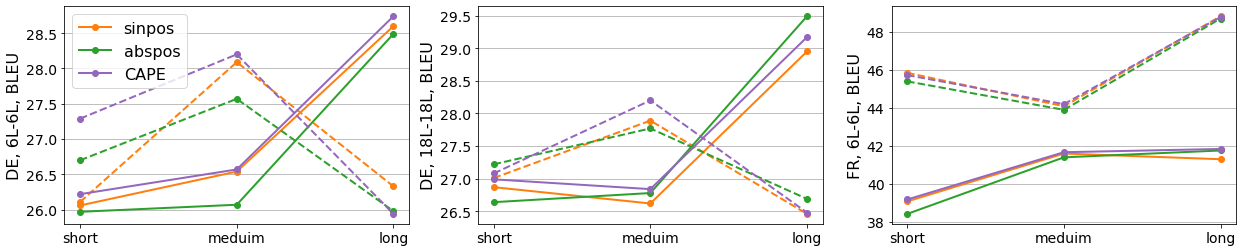

In [485]:
# models_long = {
#     "de sinpos 6-6, 97": "eval_split_sinpos_6l_en_de",
#     "de cape 6-6, 100": "eval_split_cape_6l_en_de",
# }

models_long_de = {
    "sinpos": "eval_split_de_sinpos_6l_en_de",
    "abspos": "eval_split_de_abspos_6l_en_de",
#     "de cape 6-6, 100": "eval_split_de_cape_6l_en_de",
    "CAPE": "eval_split_de_cape_6l_en_de_gl_5_750k",
#     "de cape 6-6 gl_int20": "eval_split_de_cape_6l_en_de_gl_int20"
}

prefix_long = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/nmt-experiments/"
plt.figure(figsize=(21, 4))
plt.subplot(1, 3, 1)
plt.grid(axis="y")
for (label, log), color in zip(models_long_de.items(), ['#ff7f0e', '#2ca02c', '#9467bd']):
    plot_log_split(prefix_long + log, label=label, color=color, prefix="DE, 6L-6L,")
plt.legend(fontsize=16) #loc=(0.6, 1.02), ncol=3)


models_long_de_18 = {
    "sinpos": "eval_split_de_sinpos_18l_en_de", 
    "abspos": "eval_split_de_abspos_18l_en_de",
    "CAPE": "eval_split_de_cape_18l_en_de_gl_10_750k",
}

prefix_long = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/nmt-experiments/"
plt.subplot(1, 3, 2)
plt.grid(axis="y")
for (label, log), color in zip(models_long_de_18.items(), ['#ff7f0e', '#2ca02c', '#9467bd']):
    plot_log_split(prefix_long + log, label=label, color=color, prefix="DE, 18L-18L,")

models_long_fr = {
    "sinpos": "eval_split_fr_sinpos_6l_en_fr",
    "abspos": "eval_split_fr_abspos_6l_en_fr",
    "cape": "eval_split_fr_cape_6l-5_en_fr"
}

prefix_long = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/nmt-experiments/"
plt.subplot(1, 3, 3)
plt.grid(axis="y")
for (label, log), color in zip(models_long_fr.items(), ['#ff7f0e', '#2ca02c', '#9467bd']):
    plot_log_split(prefix_long + log, label=label, color=color, prefix="FR, 6L-6L,")
plt.savefig("mt.png", dpi=300, bbox_inches="tight")

In [237]:
# prefix_long = "/checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/nmt-experiments/"
# plt.figure(figsize=(15, 6))
# plt.grid()
# for (label, log), color in zip(models_long.items(), colors):
#     plot_log_split(prefix_long + log, label=label, color=color)
# plt.legend()

# Training PPL

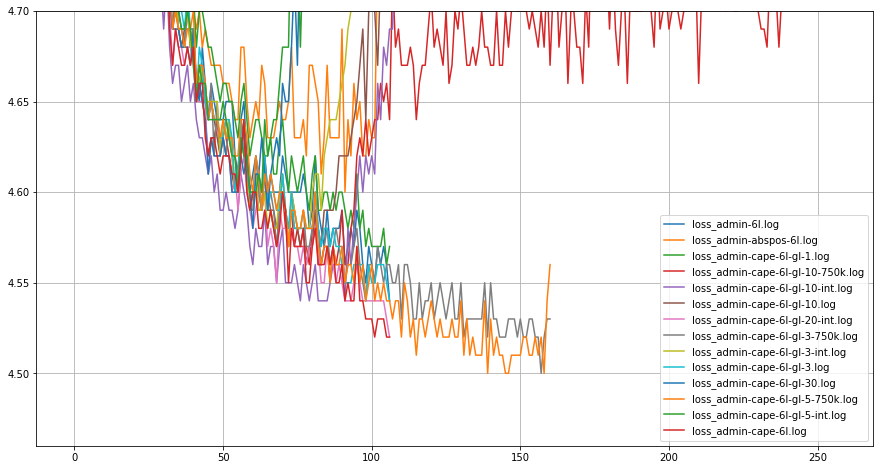

In [234]:
logs = !ls /checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/nmt-experiments/wmt14ende/log/*6l*
plt.figure(figsize=(15, 8))
plt.grid()

for l in logs:
    ppl = !cat $l | grep "valid on" | cut -f 6 -d "|" | cut -f 3 -d " "
    ppl = list(map(float, ppl))
    plt.plot(ppl, label=l.split("/")[-1])
plt.ylim(4.46, 4.7)
plt.legend()

loss_admin-18l.log 106 4.42 4.29
loss_admin-abspos-18l.log 107 4.34 4.3
loss_admin-cape-18l-gl-10-750k.log 101 4.39 4.27
loss_admin-cape-18l-gl-10-int-750k.log 101 4.36 4.28
loss_admin-cape-18l-gl-10.log 106 4.36 4.29
loss_admin-cape-18l-gl-20-int-750k.log 102 4.41 4.29
loss_admin-cape-18l-gl-5-750k.log 104 4.39 4.31
loss_admin-cape-18l-gl-5-int-750k.log 91 5.08 4.28
loss_admin-cape-18l-gl-5-int.log 101 4.43 4.31
loss_admin-cape-18l-gl-5.log 98 4.31 4.27


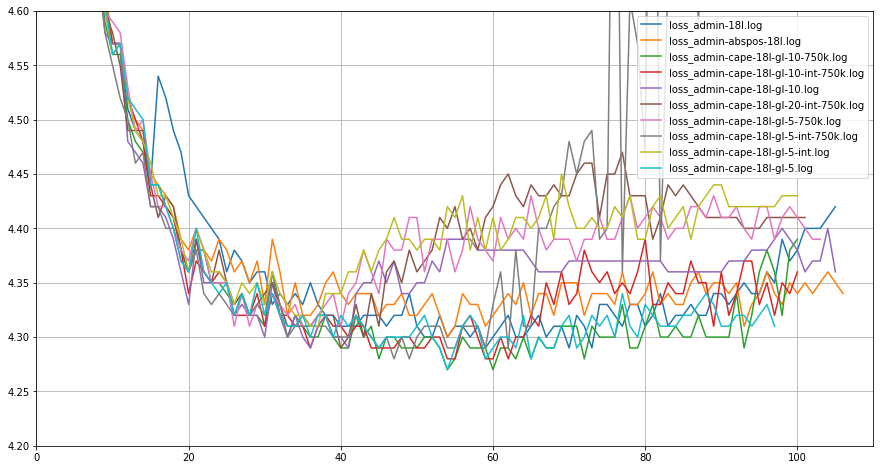

In [428]:
logs = !ls /checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/nmt-experiments/wmt14ende/log/*18l*
plt.figure(figsize=(15, 8))
plt.grid()

for l in logs:
    ppl = !cat $l | grep "valid on" | cut -f 6 -d "|" | cut -f 3 -d " "
    ppl = list(map(float, ppl))
    plt.plot(ppl, label=l.split("/")[-1])
    print(l.split("/")[-1], len(ppl), ppl[-1], min(ppl))
plt.ylim(4.2, 4.6)
plt.xlim(0, 110)
plt.legend()

loss-admin-6l.log 50 2.79
loss-admin-abspos-6l.log 18 2.79
loss-admin-cape-6l-10-int-cont.log 70 2.77
loss-admin-cape-6l-10-int.log 5 3.19
loss-admin-cape-6l-10.log 69 2.77
loss-admin-cape-6l-20-int.log 75 2.77
loss-admin-cape-6l-20.log 75 2.78
loss-admin-cape-6l-5-int.log 69 2.77
loss-admin-cape-6l-5.log 75 2.77


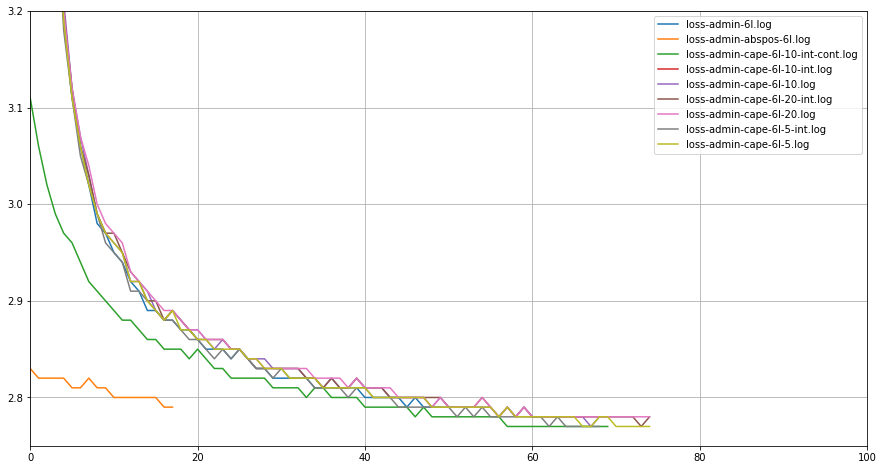

In [484]:
logs = !ls /checkpoint/antares/experiments/fl_new_master/augposemb/Transforemr-Clinic/nmt-experiments/wmt14enfr/log/*6l*
plt.figure(figsize=(15, 8))
plt.grid()

for l in logs:
    ppl = !cat $l | grep "valid on" | cut -f 6 -d "|" | cut -f 3 -d " "
    ppl = list(map(float, ppl))
    plt.plot(ppl, label=l.split("/")[-1])
    print(l.split("/")[-1], len(ppl), min(ppl))
# plt.ylim(4.46, 4.7)
plt.xlim(0, 100)
plt.ylim(2.75, 3.2)
plt.legend()